In [2]:
import os

try:
    # Cambiar al directorio raíz de tu proyecto
    os.chdir('/home/ubuntu/Escritorio/workshop2')
    print("Directory changed successfully.")
except FileNotFoundError:
    print("You are already in the correct directory.")



Directory changed successfully.


In [3]:
import sys
import os

# Agrega la ruta base del proyecto al path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))
from src.database.db_operation import creating_connection, load_raw_data

11/04/2025 10:58:54 AM INFO - Archivo .env cargado desde: /home/ubuntu/Escritorio/workshop2/src/database/../../.env


In [8]:
from src.database.db_operation import creating_connection, load_raw_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga 

In [9]:
engine = creating_connection()

11/04/2025 11:05:40 AM INFO - Conexión a la base de datos creada exitosamente.


In [10]:
query = "SELECT * FROM grammy_awards_raw"
grammys_data = pd.read_sql_query(query, engine)
grammys_data.head()


/tmp/ipykernel_370790/1817814831.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  grammys_data = pd.read_sql_query(query, engine)


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [12]:
print("Dimensiones del dataset:")
print(grammys_data.shape)

Dimensiones del dataset:
(24050, 10)


 limpieza inicial

In [13]:
grammys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24050 entries, 0 to 24049
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          24050 non-null  int64 
 1   title         24050 non-null  object
 2   published_at  24050 non-null  object
 3   updated_at    24050 non-null  object
 4   category      24050 non-null  object
 5   nominee       24050 non-null  object
 6   artist        24050 non-null  object
 7   workers       24050 non-null  object
 8   img           24050 non-null  object
 9   winner        24050 non-null  bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 1.7+ MB


In [15]:
print("\nEstadísticas descriptivas:")
grammys_data.describe()


Estadísticas descriptivas:


,year
count,24050.000000
mean,1995.566944
std,17.148294
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


In [20]:
df.columns

Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [16]:

print("Valores nulos por columna:")
print(grammys_data.isnull().sum())

Valores nulos por columna:
year            0
title           0
published_at    0
updated_at      0
category        0
nominee         0
artist          0
workers         0
img             0
winner          0
dtype: int64


In [17]:
duplicados = grammys_data.duplicated().sum()
print("\nNúmero de registros duplicados:", duplicados)


Número de registros duplicados: 19240


In [18]:
cols_obj = grammys_data.select_dtypes(include=['object']).columns
print("Columnas categóricas:", cols_obj.tolist())

Columnas categóricas: ['title', 'published_at', 'updated_at', 'category', 'nominee', 'artist', 'workers', 'img']


In [19]:
grammys_data.columns = grammys_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [20]:
grammys_data.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


Paso 2: Limpieza de texto e inconsistencias

In [21]:
print("\nAnálisis de Categorías por Década ")
grammys_data['decade'] = (grammys_data['year'] // 10) * 10  # Crear columna para décadas
categories_per_decade = grammys_data.groupby('decade')['category'].nunique()
print("Número de categorías únicas por década:")
print(categories_per_decade)


Análisis de Categorías por Década 
Número de categorías únicas por década:
decade
1950     46
1960    213
1970    117
1980    151
1990    190
2000    146
2010    161
Name: category, dtype: int64


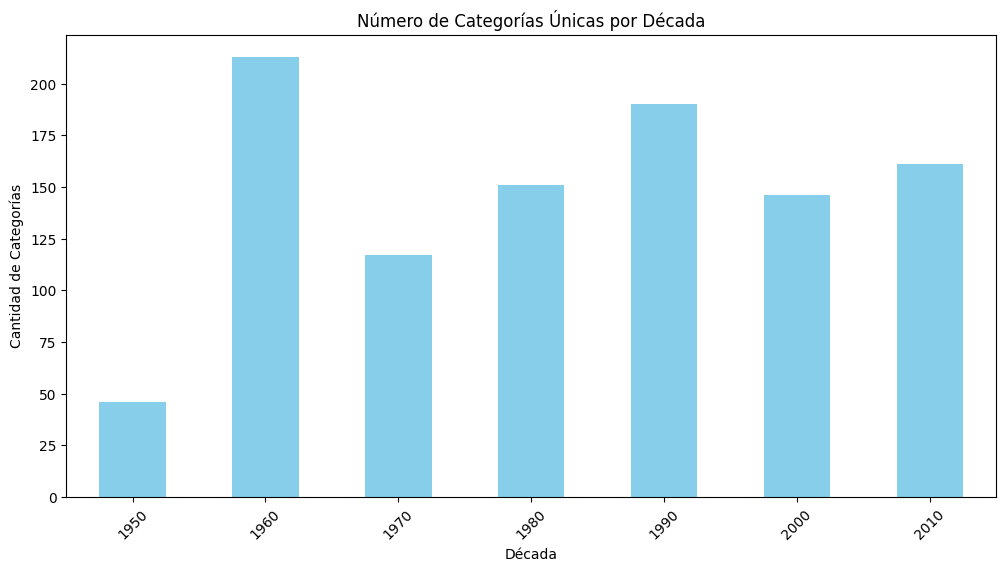

In [22]:
plt.figure(figsize=(12, 6))
categories_per_decade.plot(kind='bar', color='skyblue')
plt.title('Número de Categorías Únicas por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad de Categorías')
plt.xticks(rotation=45)
plt.show()

In [24]:
print("\n### Análisis de Géneros Musicales ###")
def infer_genre(category):
    category = category.lower()
    if 'pop' in category:
        return 'Pop'
    elif 'rock' in category:
        return 'Rock'
    elif 'r&b' in category or 'rhythm' in category:
        return 'R&B'
    elif 'rap' in category or 'hip hop' in category:
        return 'Rap/Hip Hop'
    elif 'country' in category:
        return 'Country'
    elif 'jazz' in category:
        return 'Jazz'
    elif 'classical' in category or 'opera' in category:
        return 'Classical'
    elif 'dance' in category or 'electronic' in category:
        return 'Dance/Electronic'
    else:
        return 'Other'

grammys_data['genre'] = grammys_data['category'].apply(infer_genre)
genre_counts = grammys_data['genre'].value_counts()
print("Distribución de géneros inferidos:")
print(genre_counts)


### Análisis de Géneros Musicales ###
Distribución de géneros inferidos:
genre
Other               11895
Classical            3195
Pop                  1760
Country              1760
Jazz                 1615
R&B                  1530
Rock                 1355
Rap/Hip Hop           695
Dance/Electronic      245
Name: count, dtype: int64


In [25]:
print(grammys_data['nominee'].nunique())
print(grammys_data['category'].unique())
print(grammys_data['genre'].unique())

4132
['Record Of The Year' 'Album Of The Year' 'Song Of The Year'
 'Best New Artist' 'Best Pop Solo Performance'
 'Best Pop Duo/Group Performance' 'Best Traditional Pop Vocal Album'
 'Best Recording Package' 'Best Pop Vocal Album' 'Best Dance Recording'
 'Best Dance/Electronic Album' 'Best Contemporary Instrumental Album'
 'Best Rock Performance' 'Best Metal Performance' 'Best Rock Song'
 'Best Rock Album' 'Best Alternative Music Album' 'Best R&B Performance'
 'Best Traditional R&B Performance' 'Best R&B Song'
 'Best Urban Contemporary Album' 'Best R&B Album'
 'Producer Of The Year, Classical' 'Best Rap Performance'
 'Best Rap/Sung Performance' 'Best Rap Song' 'Best Rap Album'
 'Best Country Solo Performance' 'Best Country Duo/Group Performance'
 'Best Country Song' 'Best Country Album' 'Best New Age Album'
 'Best Improvised Jazz Solo' 'Best Jazz Vocal Album'
 'Best Jazz Instrumental Album' 'Best Large Jazz Ensemble Album'
 'Best Latin Jazz Album' 'Best Gospel Performance/Song'
 'Best 

Paso 3: Análisis temporal de premios

¿Aumentan o disminuyen los premios con el tiempo?

In [26]:
grammys_data["winner"].value_counts()

winner
True    24050
Name: count, dtype: int64

In [27]:

winners = grammys_data[grammys_data['winner'] == True]

awards_per_year = winners.groupby('year').size()

Años con más premios

In [28]:
grammys_data['year'] = pd.to_numeric(grammys_data['year'], errors='coerce')

grammys_data['published_at'] = pd.to_datetime(grammys_data['published_at'], errors='coerce')

/tmp/ipykernel_370790/4090027640.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  grammys_data['published_at'] = pd.to_datetime(grammys_data['published_at'], errors='coerce')


In [29]:
top_years = awards_per_year.sort_values(ascending=False).head(10)
print(top_years)

year
2019    2165
2007     555
2008     555
2006     550
2010     545
2009     545
2005     540
2004     535
2003     525
2002     520
dtype: int64


In [30]:
top_years_df = top_years.reset_index()
top_years_df.columns = ['year', 'count']

11/04/2025 11:15:15 AM INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_370790/3701969862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_years_df, x="year", y="count", palette="Blues_d")
11/04/2025 11:15:15 AM INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


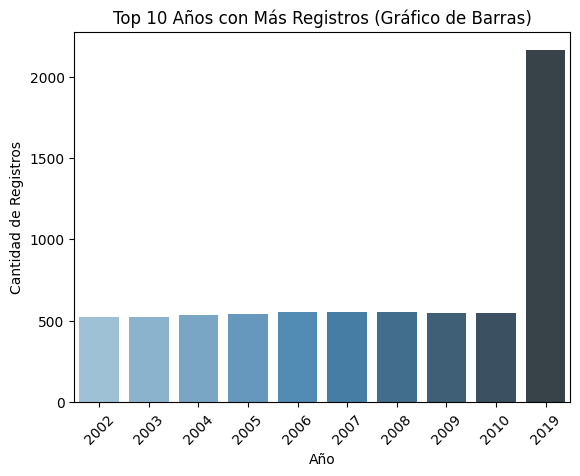

In [31]:

plt.figure()
sns.barplot(data=top_years_df, x="year", y="count", palette="Blues_d")
plt.title("Top 10 Años con Más Registros (Gráfico de Barras)")
plt.xlabel("Año")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.show()

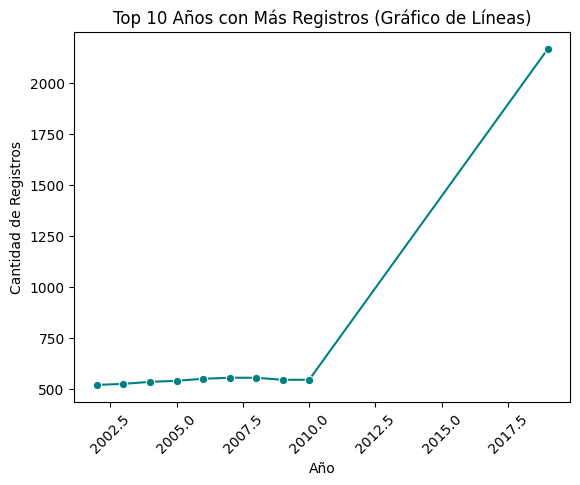

In [32]:
plt.figure()
sns.lineplot(data=top_years_df, x="year", y="count", marker="o", color="teal")
plt.title("Top 10 Años con Más Registros (Gráfico de Líneas)")
plt.xlabel("Año")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)
plt.show()

In [33]:
grammys_data['published_at'] = pd.to_datetime(grammys_data['published_at'], utc=True)

In [34]:
grammys_data['year'] = grammys_data['published_at'].dt.year

publicaciones_por_año = grammys_data.groupby("year").size().reset_index(name="count")
print("\nPublicaciones por Año (extraído de published_at):")
print(publicaciones_por_año)



Publicaciones por Año (extraído de published_at):
   year  count
0  2017  21025
1  2018    860
2  2020   2165


11/04/2025 11:16:31 AM INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/tmp/ipykernel_370790/2919492420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publicaciones_por_año, x="year", y="count", palette="Blues_d")
11/04/2025 11:16:31 AM INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


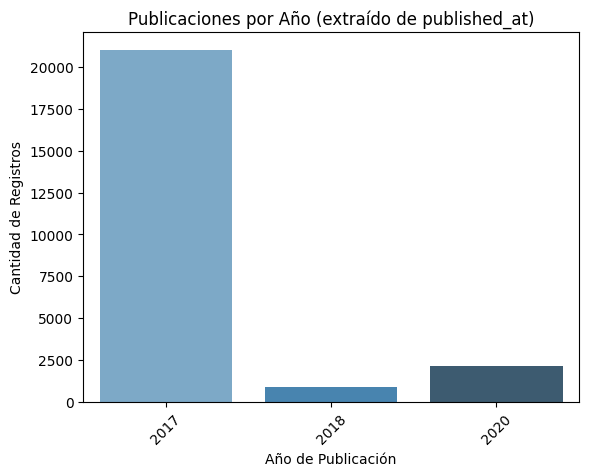

In [35]:

plt.figure()
sns.barplot(data=publicaciones_por_año, x="year", y="count", palette="Blues_d")
plt.title("Publicaciones por Año (extraído de published_at)")
plt.xlabel("Año de Publicación")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)
plt.show()

Por década

Artistas más premiados

In [36]:
top_workers = grammys_data['workers'].value_counts().head(10)
print("Top 10 Workers:")
print(top_workers)


Top 10 Workers:
workers
NaN                                                                             10950
John Williams, composer (John Williams)                                           100
Vladimir Horowitz, artist                                                          75
Henry Mancini, arranger (Henry Mancini)                                            40
(Chicago Symphony Orchestra)                                                       35
Robert Shaw, conductor (Atlanta Symphony Chorus; Atlanta Symphony Orchestra)       35
(Boston Symphony Orchestra)                                                        30
Georg Solti, conductor (Chicago Symphony Orchestra)                                30
Michael Brecker, soloist                                                           30
Dave Grusin, arranger (Dave Grusin)                                                25
Name: count, dtype: int64


<Axes: ylabel='category'>

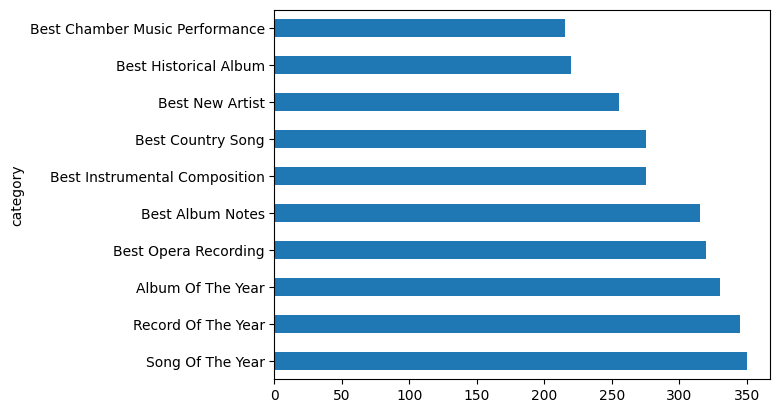

In [37]:
grammys_data['category'].value_counts().head(10).plot(kind='barh')


In [38]:
top_artists = winners['nominee'].value_counts().head(10)
print(top_artists)

nominee
Steven Epstein                35
Bridge Over Troubled Water    35
Berlioz: Requiem              35
Robert Woods                  35
David Frost                   30
Britten: War Requiem          30
A Taste Of Honey              30
NaN                           30
Up, Up And Away               30
West Side Story               25
Name: count, dtype: int64


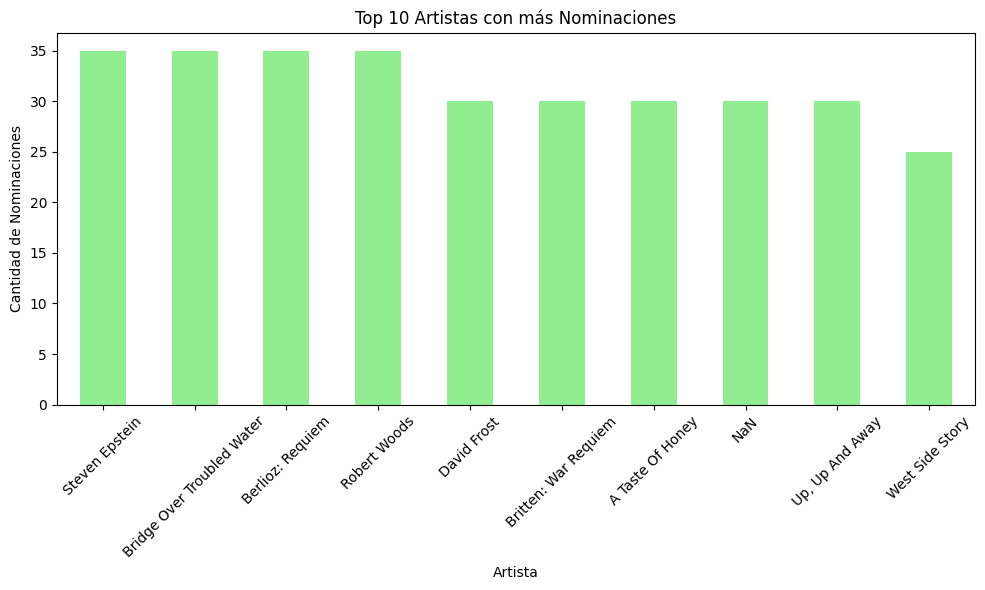

In [39]:
top_artists = winners['nominee'].value_counts().head(10)


plt.figure(figsize=(10,6))
top_artists.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Artistas con más Nominaciones')
plt.xlabel('Artista')
plt.ylabel('Cantidad de Nominaciones')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Análisis por género musical

In [40]:
genre_awards = winners['genre'].value_counts().head(10)
print(genre_awards)

genre
Other               11895
Classical            3195
Pop                  1760
Country              1760
Jazz                 1615
R&B                  1530
Rock                 1355
Rap/Hip Hop           695
Dance/Electronic      245
Name: count, dtype: int64


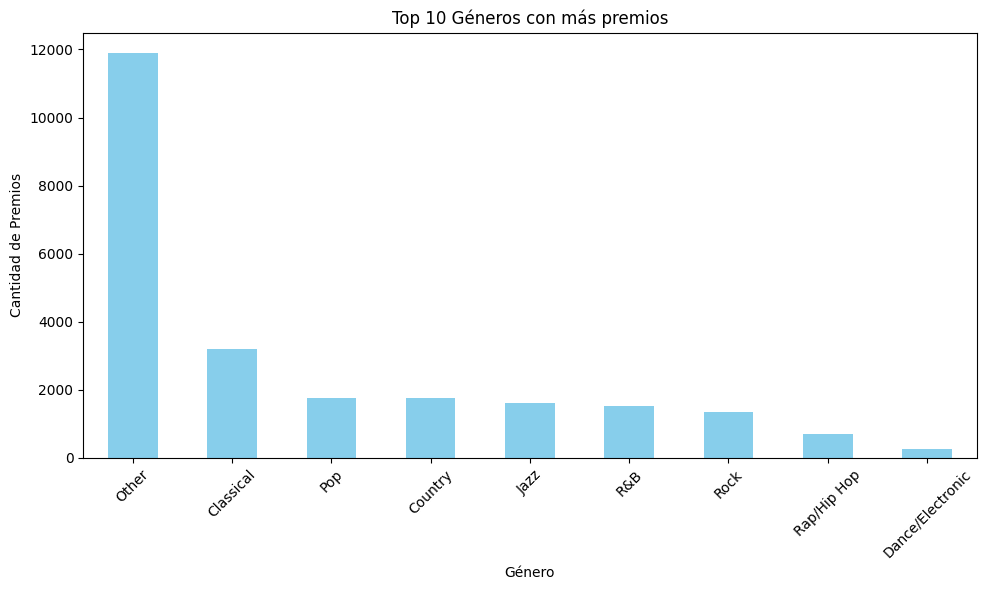

In [41]:
genre_awards = winners['genre'].value_counts().head(10)


plt.figure(figsize=(10,6))
genre_awards.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros con más premios')
plt.xlabel('Género')
plt.ylabel('Cantidad de Premios')
plt.xticks(rotation=45)
plt.tight_layout()

#
plt.show()